# Understanding Street Datasets using two examples of Lion (NYC) and OSMnx

### Layout:

1. Restricting and visualizing Lion data for Brownsville, Brooklyn
2. Dissecting the street file of Lion (lion_street_cols file)
3. Restricting and visualizing OSMnx data for Brownsville, Brooklyn
4. Dissecting the street file of OSMnx (osmnx_street_cols file)
5. Comparison of the two datasets

In [1]:
#Importing necessary packages

import geopandas as gpd
import pandas as pd
import matplotlib.pylab as plt
import fiona
import osmnx as ox

%matplotlib inline

### Reading in the Neighborhood tabulation data

In [2]:
nta = gpd.read_file('nynta/nynta.shp')
nta.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
BoroCode      195 non-null int64
BoroName      195 non-null object
CountyFIPS    195 non-null object
NTACode       195 non-null object
NTAName       195 non-null object
Shape_Area    195 non-null float64
Shape_Leng    195 non-null float64
geometry      195 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 12.3+ KB


In [3]:
#View the top 5 roads

nta.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Area,Shape_Leng,geometry
0,3,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.228028,"POLYGON ((990897.9000244141 169268.1207885742,..."
1,4,Queens,081,QN52,East Flushing,2.945438e+07,25843.364934,"POLYGON ((1041061.948242188 215429.4609985352,..."
2,4,Queens,081,QN48,Auburndale,3.416422e+07,32446.878764,"POLYGON ((1046392.971191406 210169.7536010742,..."
3,4,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904732,"POLYGON ((1038593.459228516 221913.3550415039,..."
4,4,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.712116,"POLYGON ((1022728.275024414 217530.8082275391,..."


### Visualizing the NY neighborhood shapefiles

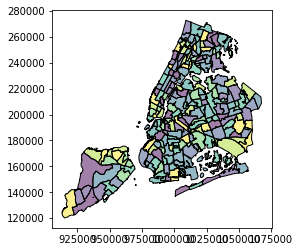

In [4]:
fig = plt.figure(figsize=(10,10))
nta.plot()

### Filtering the neighborhood file to limit to Brownsville, Brooklyn

In [5]:
nta_filtered = nta[nta['NTAName'] == 'Brownsville']
nta_filtered.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1 entries, 62 to 62
Data columns (total 8 columns):
BoroCode      1 non-null int64
BoroName      1 non-null object
CountyFIPS    1 non-null object
NTACode       1 non-null object
NTAName       1 non-null object
Shape_Area    1 non-null float64
Shape_Leng    1 non-null float64
geometry      1 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 72.0+ bytes


## LION file

### Reading in the LION node file for Brooklyn

In [6]:
#Read in Brooklyn nodes

nodes_lion = gpd.read_file('bk_nodes/bk_nodes.shp')
nodes_lion.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27527 entries, 0 to 27526
Data columns (total 5 columns):
NODEID        27527 non-null int64
VIntersect    667 non-null object
geometry      27527 non-null object
x             27527 non-null float64
y             27527 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.1+ MB


In [7]:
#View first 5 rows

nodes_lion.head()

,NODEID,VIntersect,geometry,x,y
0,12467,None,POINT (983651.0378806833 142702.6200377709),983651.0,142703.0
1,16250,None,POINT (995563.7107093602 144423.9259025949),995564.0,144424.0
2,16287,None,POINT (997952.5877162114 144915.9931382628),997953.0,144916.0
3,16319,None,POINT (999889.1956343707 145177.6474590867),999889.0,145178.0
4,9026862,None,POINT (1001918.170161624 145444.0199460915),1001920.0,145444.0


### Reading in the LION street file for Brooklyn

In [8]:
#Read in Brooklyn streets

streets_lion = gpd.read_file('bk_streets/bk_streets.shp')
streets_lion.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 47905 entries, 0 to 47904
Columns: 114 entries, ArcCenterX to geometry
dtypes: float64(2), int64(15), object(97)
memory usage: 41.7+ MB


In [9]:
#View first 5 rows

streets_lion.head()

,ArcCenterX,ArcCenterY,BOE_LGC,BikeLane,BoroBndry,Carto_Disp,ConParity,CurveFlag,FCC,FDNYID,...,ToLeft,ToRight,TrafDir,TrafSrc,Twisted,XFrom,XTo,YFrom,YTo,geometry
0,0,0,1,None,None,None,None,None,None,None,...,6199,6198,T,DOT,None,980207,980046,171561,171358,LINESTRING (980207.1080178767 171560.986766696...
1,0,0,1,None,None,20,None,None,None,None,...,7299,7298,T,DOT,None,980285,980086,167800,167626,LINESTRING (980284.7916215658 167799.750988051...
2,0,0,1,None,None,None,None,None,None,None,...,499,498,A,DOT,None,980291,980902,174178,173694,LINESTRING (980291.1432218701 174178.074590995...
3,0,0,1,None,None,None,None,None,None,None,...,651,652,W,DOT,None,977689,977939,164627,164463,LINESTRING (977688.8749982715 164627.211637362...
4,0,0,1,None,None,None,None,None,None,None,...,0,7598,W,DOT,None,979076,978987,167736,167453,LINESTRING (979076.1193641573 167735.630384996...


### Limiting the LION files to Brownsville by spatially joining these geodataframes to nta_filtered

In [10]:
#Performing a spatial join to get lion streets for Brownsville, Brooklyn

lion_brownsville_streets = gpd.sjoin(streets_lion, nta_filtered, how = 'inner', op = 'intersects')
lion_brownsville_streets.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1334 entries, 1656 to 47845
Columns: 122 entries, ArcCenterX to Shape_Leng
dtypes: float64(4), int64(17), object(101)
memory usage: 1.3+ MB


In [11]:
#Performing a spatial join to get lion nodes for Brownsville, Brooklyn

lion_brownsville_nodes = gpd.sjoin(nodes_lion, nta_filtered, how = 'inner', op = 'intersects')
lion_brownsville_nodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 745 entries, 14096 to 19478
Data columns (total 13 columns):
NODEID         745 non-null int64
VIntersect     14 non-null object
geometry       745 non-null object
x              745 non-null float64
y              745 non-null float64
index_right    745 non-null int64
BoroCode       745 non-null int64
BoroName       745 non-null object
CountyFIPS     745 non-null object
NTACode        745 non-null object
NTAName        745 non-null object
Shape_Area     745 non-null float64
Shape_Leng     745 non-null float64
dtypes: float64(4), int64(3), object(6)
memory usage: 81.5+ KB


### Plotting LION streets for Brownsville

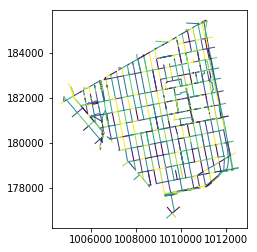

In [12]:
#Plotting Brownsville Streets

fig = plt.figure(figsize=(30,30))
lion_brownsville_streets.plot()

## OSM

### Creating an instance of the street-node graph for Brooklyn and plotting it

/home/vr00n/.local/lib/python2.7/site-packages/requests/packages/urllib3/util/ssl_.py:334: SNIMissingWarning: An HTTPS request has been made, but the SNI (Subject Name Indication) extension to TLS is not available on this platform. This may cause the server to present an incorrect TLS certificate, which can cause validation failures. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  SNIMissingWarning
/home/vr00n/.local/lib/python2.7/site-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning


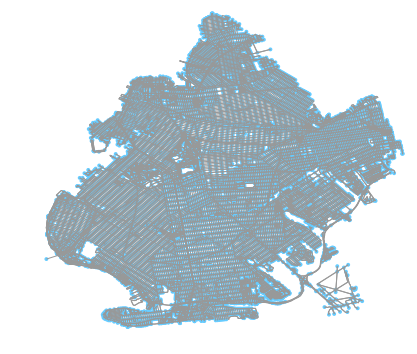

(<matplotlib.figure.Figure at 0x7fe3dfd96e10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe3bfccd1d0>)

In [13]:
#Select location and plot it

G = ox.graph_from_place('Brooklyn, USA')
ox.plot_graph(G)

In [14]:
type(G)

networkx.classes.multidigraph.MultiDiGraph

### Save the graph as a shapefile that can be loaded and manipulated

In [15]:
#Save the graph as a shapefile

ox.save_graph_shapefile(G, filename='brooklyn_osmnx')

In [16]:
#Read in the the streets as a shapefile

streets_osmnx = gpd.read_file('data/brooklyn_osmnx/edges/edges.shp')
streets_osmnx.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32124 entries, 0 to 32123
Data columns (total 18 columns):
access       948 non-null object
bridge       344 non-null object
est_width    6 non-null object
from         32124 non-null object
geometry     32124 non-null object
highway      32124 non-null object
key          32124 non-null object
lanes        2554 non-null object
length       32124 non-null object
maxspeed     807 non-null object
name         24287 non-null object
oneway       32124 non-null object
osmid        32124 non-null object
ref          427 non-null object
service      1341 non-null object
to           32124 non-null object
tunnel       31 non-null object
width        97 non-null object
dtypes: object(18)
memory usage: 4.4+ MB


In [17]:
#Check the current Coordinate system of the streets file

streets_osmnx.crs

{'init': u'epsg:4326'}

In [18]:
#Change the coordinate system

streets_osmnx = streets_osmnx.to_crs({'init' :'epsg:4269'})

In [19]:
#View first 5 rows

streets_osmnx.head()

,access,bridge,est_width,from,geometry,highway,key,lanes,length,maxspeed,name,oneway,osmid,ref,service,to,tunnel,width
0,None,None,None,1955847282,"LINESTRING (-74.02460910000001 40.605581, -74....","[u'service', u'footway']",0,None,18.5448575522,None,None,False,"[185010120, 185010090]",None,driveway,1955847382,None,None
1,None,None,None,1955847380,"LINESTRING (-74.0246295 40.6057229, -74.024531...",residential,0,None,8.27211431539,None,Sterling Drive,False,5682215,None,None,1955847382,None,None
2,None,None,None,2037630245,"LINESTRING (-74.0246295 40.6057229, -74.024690...",residential,0,None,5.16302133513,None,Sterling Drive,False,5682215,None,None,1955847382,None,None
3,None,None,None,1931149323,"LINESTRING (-73.9347688 40.5763037, -73.934626...",footway,0,None,12.0687528013,None,None,False,182759575,None,None,1931149313,None,None
4,None,None,None,1257569793,"LINESTRING (-73.88574699999999 40.6285294, -73...",footway,0,None,68.7690716854,None,None,False,109971959,None,None,1257570306,None,None


In [20]:
#Read in the nodes file of OSMnx

nodes_osmnx = gpd.read_file('data/brooklyn_osmnx/nodes/nodes.shp')
nodes_osmnx.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19434 entries, 0 to 19433
Data columns (total 4 columns):
geometry    19434 non-null object
highway     1643 non-null object
osmid       19434 non-null object
ref         72 non-null object
dtypes: object(4)
memory usage: 607.4+ KB


### Ensure all the geodataframes have the same coordinate system

In [21]:
#Check the current Coordinate system of the nodes file

nodes_osmnx.crs

{'init': u'epsg:4326'}

In [22]:
#Change the coordinate system

nodes_osmnx = nodes_osmnx.to_crs({'init' :'epsg:4269'})

In [23]:
#View the first 5 rows

nodes_osmnx.head()

,geometry,highway,osmid,ref
0,POINT (-73.890404 40.643689),None,42460102,None
1,POINT (-73.88827000000001 40.645062),None,42460105,None
2,POINT (-73.903589 40.635803),None,42460121,None
3,POINT (-73.902781 40.635077),None,42460123,None
4,POINT (-73.902466 40.634792),None,42460126,None


In [24]:
#Check the current Coordinate system of the NTA file

nta_filtered.crs

{u'datum': u'NAD83',
 u'lat_0': 40.16666666666666,
 u'lat_1': 40.66666666666666,
 u'lat_2': 41.03333333333333,
 u'lon_0': -74,
 u'no_defs': True,
 u'proj': u'lcc',
 u'units': u'us-ft',
 u'x_0': 300000,
 u'y_0': 0}

In [25]:
#Change the coordinate system

nta_filtered = nta_filtered.to_crs({'init' :'epsg:4269'})

### Limiting the OSM files to Brownsville by spatially joining these geodataframes to nta_filtered

In [26]:
#Performing a spatial join to get OSMnx streets for Brownsville, Brooklyn

osm_brownsville_streets = gpd.sjoin(streets_osmnx, nta_filtered, how = 'inner', op = 'intersects')
osm_brownsville_streets.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 571 entries, 226 to 31442
Data columns (total 26 columns):
access         0 non-null object
bridge         5 non-null object
est_width      0 non-null object
from           571 non-null object
geometry       571 non-null object
highway        571 non-null object
key            571 non-null object
lanes          81 non-null object
length         571 non-null object
maxspeed       0 non-null object
name           522 non-null object
oneway         571 non-null object
osmid          571 non-null object
ref            13 non-null object
service        0 non-null object
to             571 non-null object
tunnel         1 non-null object
width          0 non-null object
index_right    571 non-null int64
BoroCode       571 non-null int64
BoroName       571 non-null object
CountyFIPS     571 non-null object
NTACode        571 non-null object
NTAName        571 non-null object
Shape_Area     571 non-null float64
Shape_Leng     571 non-nu

In [27]:
#Performing a spatial join to get lion nodes for Brownsville, Brooklyn

osm_brownsville_nodes = gpd.sjoin(nodes_osmnx, nta_filtered, how = 'inner', op = 'intersects')
osm_brownsville_nodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 286 entries, 129 to 19245
Data columns (total 12 columns):
geometry       286 non-null object
highway        16 non-null object
osmid          286 non-null object
ref            0 non-null object
index_right    286 non-null int64
BoroCode       286 non-null int64
BoroName       286 non-null object
CountyFIPS     286 non-null object
NTACode        286 non-null object
NTAName        286 non-null object
Shape_Area     286 non-null float64
Shape_Leng     286 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 29.0+ KB


### Plotting OSMnx streets for Brownsville

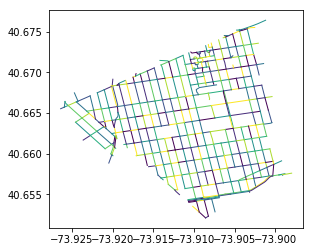

In [28]:
#Visualizing it

osm_brownsville_streets.plot()

### Distribution of types of streets/roads in Brownsville

In [29]:
lion_brownsville_streets['RW_TYPE'].value_counts()

1     1146
12      25
6       17
10       5
8        5
3        4
13       4
Name: RW_TYPE, dtype: int64

## Comparison

In [30]:
print("Lion Streets : " + str(lion_brownsville_streets.shape))
print("Lion Nodes : " + str(lion_brownsville_nodes.shape))
print("OSMnx Streets : " + str(osm_brownsville_streets.shape))
print("OSMnx Nodes : " + str(osm_brownsville_nodes.shape))

Lion Streets : (1334, 122)
Lion Nodes : (745, 13)
OSMnx Streets : (571, 26)
OSMnx Nodes : (286, 12)
